# Mineração de dados de cotação do café



## Introdução

O café é uma das commodities mais consumidas em todo o mundo, e os preços do café são influenciados por uma série de fatores, incluindo condições climáticas, oferta e demanda global, câmbio e muito mais. Prever os preços do café é um desafio significativo devido à natureza complexa e volátil desse mercado. Neste trabalho é explorado como as redes neurais podem ser usadas para prever os preços do café, com um foco especial em utilizar a biblioteca TensorFlow em Python.

## Base de Dados Escolhidas

Para realizar esta análise, foi selecionado um conjunto de dados de preços globais do café. Os dados incluem informações sobre os preços mensais do café ao longo de várias décadas desde 1988. Inicialmente, são carregados os dados de um arquivo CSV usando a biblioteca Pandas e são apresentados em uma série temporal.

### Global Coffee Prices
[Global Coffee Prices](https://tradingeconomics.com/commodity/coffee)
### CEPEA-USP
[CEPEA-USP](https://www.cepea.esalq.usp.br/br/indicador/cafe.aspx)
### Portal Notícias Agrícolas Sul de Minas
[Portal Notícias Agrícolas Sul de Minas](https://www.noticiasagricolas.com.br/cotacoes/cafe)
### Kaggle
[Kaggle](https://www.kaggle.com/datasets/psycon/daily-coffee-price/data)
### INPE
[INPE WRF 70 km](https://previsaonumerica.cptec.inpe.br/#WRF_cpt_07KM/Mais%20recente/empty/0/)

In [4]:
# Importar as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [5]:
# Carregar os dados a partir do arquivo CSV
file_path = "/content/globalCoffeePrices_data.csv"
df = pd.read_csv(file_path, parse_dates=["DATE"])

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# Selecionar a coluna de preços
data = df["PCOFFOTMUSDM"].values
data = data.reshape(-1, 1)

In [8]:
# Normalizar os dados entre 0 e 1
data_min = np.min(data)
data_max = np.max(data)
data = (data - data_min) / (data_max - data_min)

In [9]:
# Dividir os dados em treinamento e teste
train_size = int(len(data) * 0.67)
train_data, test_data = data[0:train_size, :], data[train_size:len(data), :]

In [10]:
# Função para criar sequências de dados com base no histórico
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

In [11]:
# Definir o comprimento das sequências
seq_length = 12

# Criar sequências de treinamento
X_train, y_train = create_sequences(train_data, seq_length)

# Criar sequências de teste
X_test, y_test = create_sequences(test_data, seq_length)

In [12]:
# Construir o modelo de rede neural
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(loss="mean_squared_error", optimizer="adam")

## Pré-Processamento dos Dados

Antes de alimentar os dados em uma rede neural, foram realizadas algumas etapas importantes de pré-processamento. Primeiro, foram normalizados os preços do café para garantir que estejam na mesma escala. Isso foi feito usando o MinMaxScaler do Scikit-Learn. Em seguida, foram divididos os dados em conjuntos de treinamento e teste. A parte inicial dos dados é usada para treinar o modelo, enquanto a parte final é reservada para testar as previsões.
Modelagem da Rede Neural

Foi utilizado uma rede neural recorrente (RNN) com uma camada LSTM (Long Short-Term Memory) para modelar a série temporal dos preços do café. A rede é implementada usando o TensorFlow e a biblioteca Keras, que fornece uma interface amigável para construir modelos de aprendizado profundo.

A arquitetura da rede neural consiste em uma camada LSTM com 50 unidades, seguida por uma camada densa que gera a previsão final. O otimizador "adam" é usado para minimizar a função de perda "mean_squared_error". O modelo foi treinado por 100 épocas com um tamanho de lote de 32.

In [13]:
# Treinar o modelo
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Realizar previsões
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverter a escala das previsões para obter valores reais
train_predict = train_predict * (data_max - data_min) + data_min
test_predict = test_predict * (data_max - data_min) + data_min

Epoch 1/100
9/9 [==============================] - 2s 11ms/step - loss: 0.0854
Epoch 2/100
9/9 [==============================] - 0s 8ms/step - loss: 0.0197
Epoch 3/100
9/9 [==============================] - 0s 8ms/step - loss: 0.0188
Epoch 4/100
9/9 [==============================] - 0s 9ms/step - loss: 0.0125
Epoch 5/100
9/9 [==============================] - 0s 9ms/step - loss: 0.0115
Epoch 6/100
9/9 [==============================] - 0s 9ms/step - loss: 0.0106
Epoch 7/100
9/9 [==============================] - 0s 11ms/step - loss: 0.0102
Epoch 8/100
9/9 [==============================] - 0s 8ms/step - loss: 0.0102
Epoch 9/100
9/9 [==============================] - 0s 9ms/step - loss: 0.0100
Epoch 10/100
9/9 [==============================] - 0s 9ms/step - loss: 0.0094
Epoch 11/100
9/9 [==============================] - 0s 10ms/step - loss: 0.0089
Epoch 12/100
9/9 [==============================] - 0s 9ms/step - loss: 0.0092
Epoch 13/100
9/9 [==============================] - 0s 9ms

## Treinamento e Avaliação

Após treinar o modelo com os dados de treinamento, foi avaliado o desempenho usando os dados de teste. Para isso, foram feitas previsões em ambos os conjuntos de treinamento e teste e foi calculado o erro médio quadrado (MSE) das previsões. O MSE é uma medida de quão bem o modelo está se saindo na tarefa de previsão.

## Previsões Futuras

Uma das partes mais interessantes desse projeto é a capacidade do modelo treinado de fazer previsões para o futuro. Usamos os dados mais recentes para prever os preços do café para os próximos 20 anos, gerando uma série temporal de previsões.

## Resultados e Visualização

Finalmente, visualizamos os resultados das previsões e os comparamos com os dados reais. O gráfico resultante mostra as previsões de treinamento e teste, bem como as previsões futuras em relação aos dados reais de preços do café.

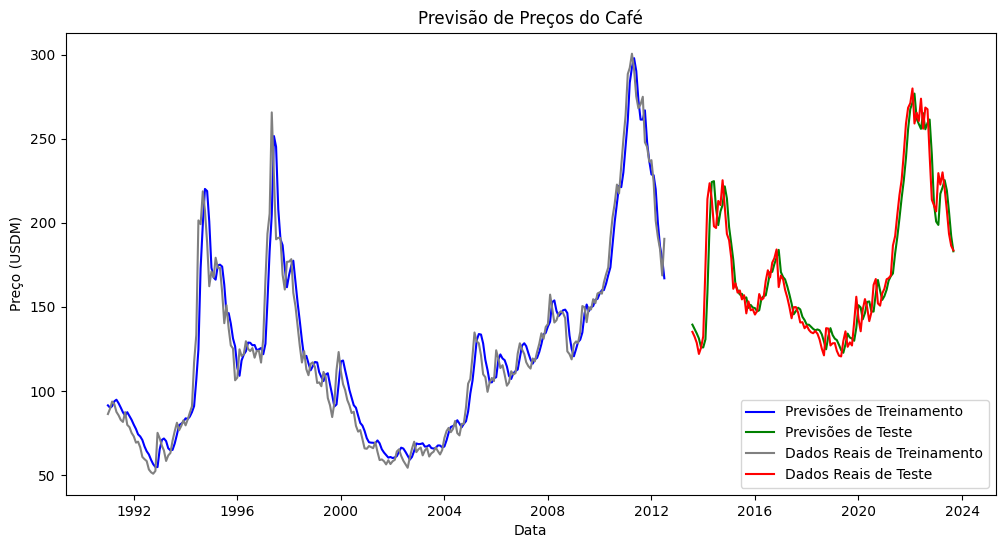

In [14]:
# Plotar os resultados
plt.figure(figsize=(12, 6))
plt.plot(df["DATE"].values[seq_length:train_size], train_predict, label="Previsões de Treinamento", color="blue")
plt.plot(df["DATE"].values[train_size + seq_length:], test_predict, label="Previsões de Teste", color="green")
plt.plot(df["DATE"].values[seq_length:train_size], df["PCOFFOTMUSDM"].values[seq_length:train_size], label="Dados Reais de Treinamento", color="gray")
plt.plot(df["DATE"].values[train_size + seq_length:], df["PCOFFOTMUSDM"].values[train_size + seq_length:], label="Dados Reais de Teste", color="red")
plt.title("Previsão de Preços do Café")
plt.xlabel("Data")
plt.ylabel("Preço (USDM)")
plt.legend()
plt.show()

## Considerações Finais

A capacidade de fazer previsões precisas sobre os preços das commodities como o café pode ser valiosa para produtores, comerciantes e investidores. No entanto, é importante observar que as previsões são baseadas em dados históricos e não levam em consideração eventos imprevisíveis que podem afetar os preços, como condições climáticas extremas ou crises econômicas.

Em resumo, este trabalho ilustra como a combinação de ciência de dados, aprendizado de máquina e bibliotecas como TensorFlow pode ser aplicada para abordar problemas complexos, como a previsão de preços de commodities, e fornece uma visão fascinante sobre o mundo do café.